In [1]:
## Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the Dataset
df = pd.read_csv('zepto.csv', encoding="cp1252")

In [3]:
#Viewing the First Few Columns
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


In [4]:
# Checking the Column Dinamics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [5]:
# Checking the no. of rows and columns
rows_columns = df.shape
print(f'The number of Rows in the Zepto Dataset is {rows_columns[0]}')
print(f'The number of Columns in the Zepto Dataset is {rows_columns[1]}')

The number of Rows in the Zepto Dataset is 3732
The number of Columns in the Zepto Dataset is 9


<h3 style="text-align:center">Data Cleaning</h3>

In [6]:
# Product with Zero mrp or Zero discountedSellingPrice
df.query("mrp == 0 or discountedSellingPrice == 0")

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
3606,Home & Cleaning,Cherry Blossom Liquid Shoe Polish Neutral,0,0,1,0,75,False,75


In [7]:
# Droping the Product with Zero mrp or Zero discountedSellingPrice
df.drop(df.query("mrp == 0 or discountedSellingPrice == 0").index, inplace = True)

In [8]:
# No of Duplicate Values (Is Exists)
df.duplicated().value_counts()

False    3729
True        2
Name: count, dtype: int64

In [9]:
# Dropping the Duplicates 
df.drop_duplicates(inplace = True)

In [10]:
# Converting the price of mrp to rupees
'''
If We take the basic currency or market dinamics I am assuming that the 'mrp' column and 'discountedSellingPrice' is in Paise form.
1 Rs. = 100 paise.
1000 Gms or 1kg of Onion can Not be Rs. 2500;[ as Zepto is an Indian Company, Assuming the Currency in INR]
'''

"\nIf We take the basic currency or market dinamics I am assuming that the 'mrp' column and 'discountedSellingPrice' is in Paise form.\n1 Rs. = 100 paise.\n1000 Gms or 1kg of Onion can Not be Rs. 2500;[ as Zepto is an Indian Company, Assuming the Currency in INR]\n"

In [11]:
df['mrp'] = df['mrp']/100

In [12]:
df['discountedSellingPrice'] = df['discountedSellingPrice']/100

In [13]:
# Checking the Null Values
df.isnull().sum()

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

<h3 style="text-align:center">Analytics and Findings</h3>

<h3 style="text-align:center">Univariate Analysis</h3>

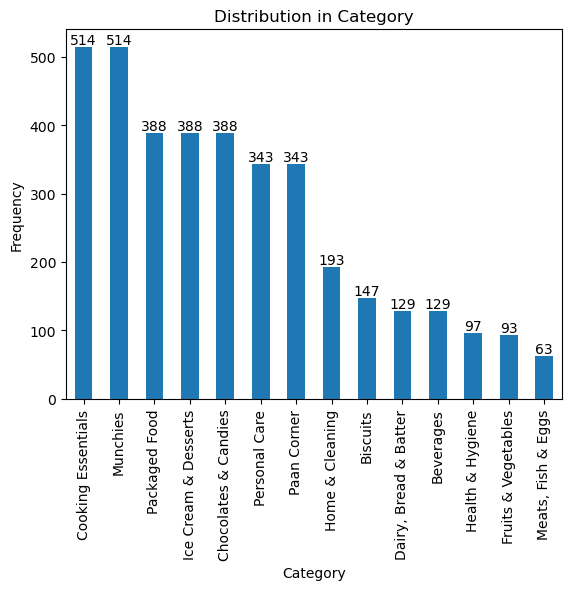

In [14]:
# Categorical Analysis
ax = df['Category'].value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),                
        (p.get_x() + p.get_width() / 2,     
         p.get_height()),                   
        ha='center', va='bottom',           
        fontsize=10, color='black'
    )
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution in Category')
plt.show()

Conclusion ::
Cooking Essentials and Munchies category has the highest number of Products.
Note :: Please Note that there are some data-quality issues in the dataset. (Please Refer the Data Quality Note: Cross-listed Products Section)

In [15]:
# Viewing the Summary Statistics of the Numerical Variables
df.select_dtypes(include = 'number').describe()

,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,quantity
count,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
mean,156.846876,7.617860,4.008313,141.970126,388.001609,213.288281
std,160.932226,9.214429,2.203364,138.543383,678.342411,194.794291
min,10.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,60.000000,0.000000,2.000000,55.000000,100.000000,50.000000
50%,110.000000,6.000000,5.000000,104.000000,225.000000,182.000000
75%,200.000000,10.000000,6.000000,184.000000,450.000000,340.000000
max,2600.000000,51.000000,6.000000,1399.000000,10000.000000,1500.000000


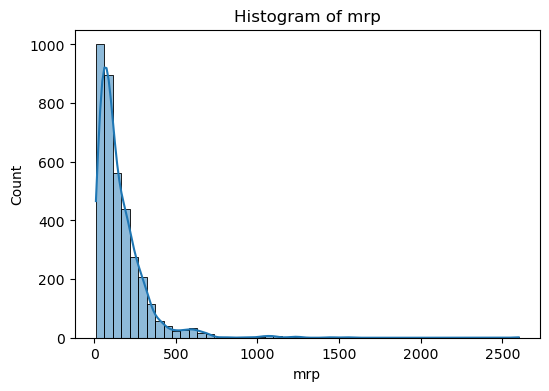

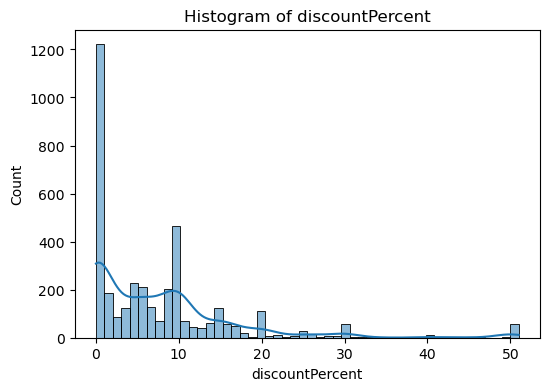

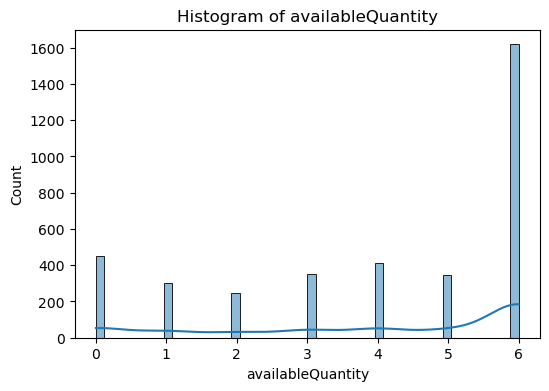

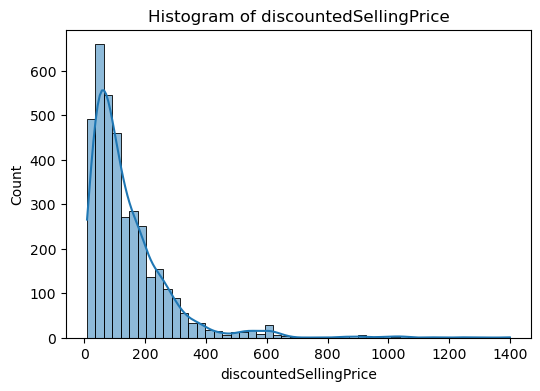

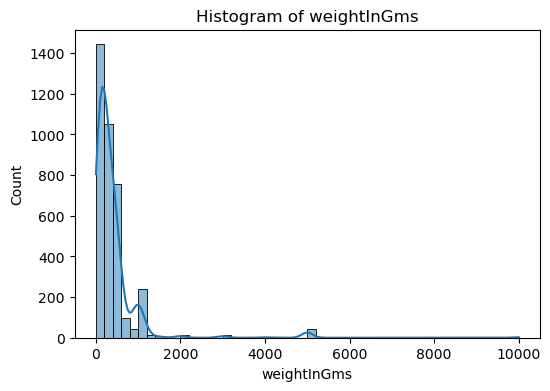

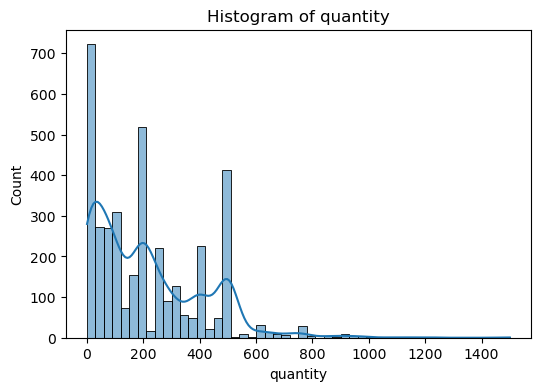

In [29]:
# Viewing the Distribution of the numerical columns
for col in df.select_dtypes(include = 'number').columns: 
    plt.figure(figsize=(6,4)) 
    sns.histplot(df[col], bins = 50, kde = True) 
    plt.title(f"Histogram of {col}") 
    plt.show()

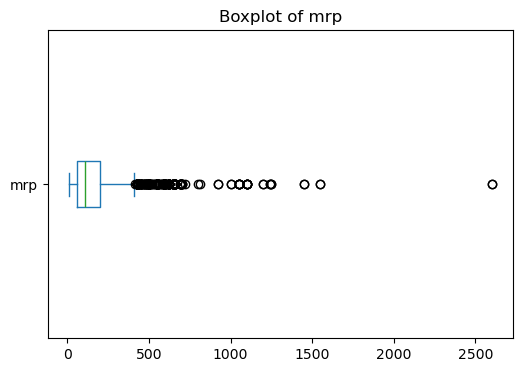

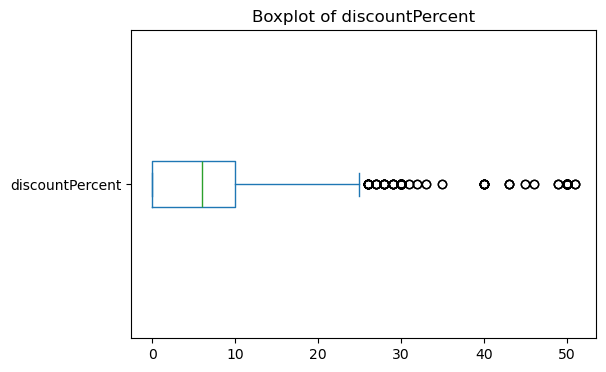

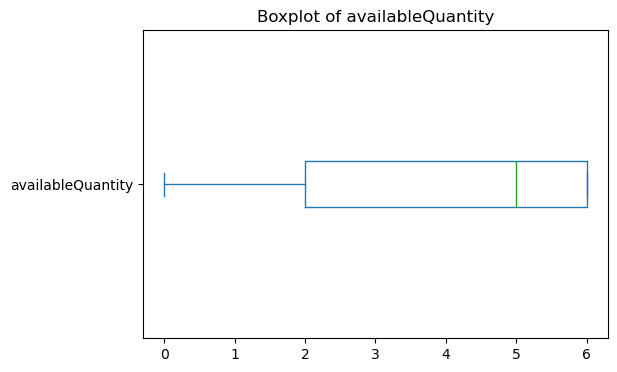

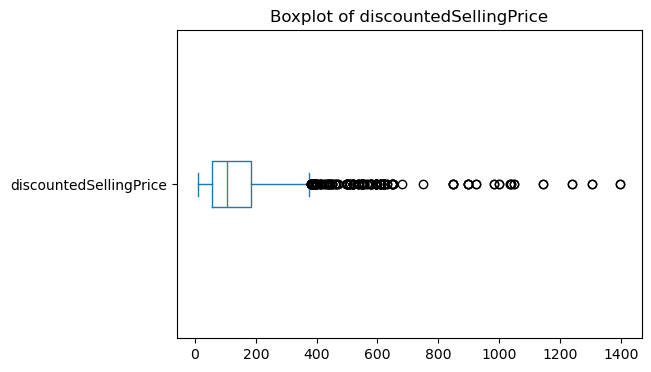

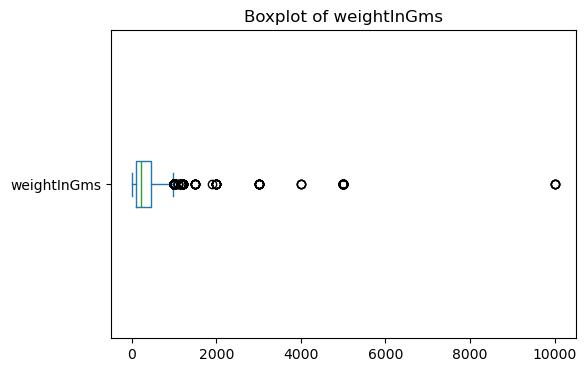

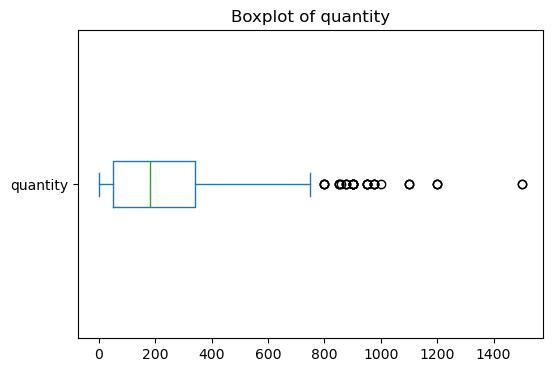

In [17]:
# Viewing the Ouliers in the numerical columns
for col in df.select_dtypes(include = 'number').columns: 
    plt.figure(figsize=(6,4)) 
    df[col].plot(kind ='box', vert = False)
    plt.title(f"Boxplot of {col}") 
    plt.show()

Being a marketplace, there are variety of Products Starting from a very low price to very high price, so the outliers are kept as these represent actual price of the product

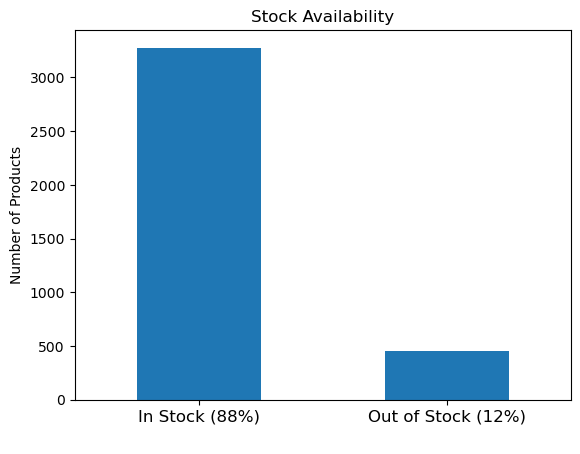

In [141]:
# Stock Availability Ratio
df['outOfStock'].value_counts().plot(kind = 'bar', rot = 0)
plt.xticks([0, 1], ['In Stock (88%)', 'Out of Stock (12%)'], fontsize=12)
plt.xlabel(' ')
plt.ylabel('Number of Products')
plt.title('Stock Availability')
plt.show()

conclusion ::
Almost 12% of the Stock is Always unavailable, Which is a good chunk of Percentage. (The Stock Planning and EOQ must be maintained along with a smooth logistics plan)
Note :: Please Note that there are some data-quality issues in the dataset. (Please Refer the Data Quality Note: Cross-listed Products Section)

<h3 style="text-align:center">Bivariate Analysis</h3>

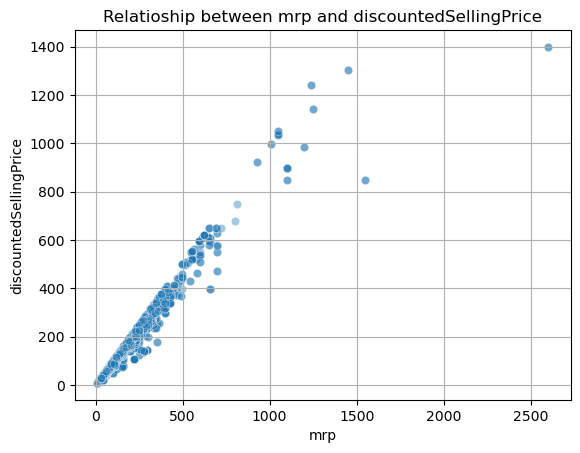

In [124]:
# mrp vs discountedSellingPrice plot
ax = sns.scatterplot(x = df['mrp'], y = df['discountedSellingPrice'], alpha = 0.4)
ax.grid(True)
plt.title("Relatioship between mrp and discountedSellingPrice")
plt.show()

Conclusion :: 
'mrp' column and 'discountedSellingPrice' are closely related. 
with increase in mrp also discountedSellingPrice increases which potentially also show's that Zepto is not giving excessive high discounts to high value goods,
Avg. DiscountPercentage is almost constant. [Refer to the Correlation Matrix]

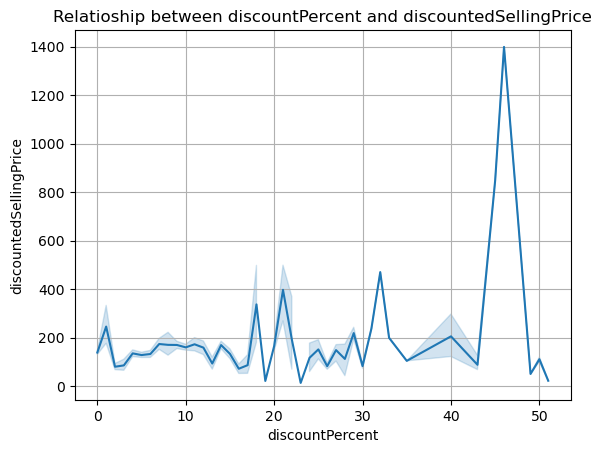

In [125]:
# discountPercent vs discountedSellingPrice plot
ax = sns.lineplot(x = df['discountPercent'], y = df['discountedSellingPrice'])
ax.grid(True)
plt.title("Relatioship between discountPercent and discountedSellingPrice")
plt.show()

Conclusion :: 
The plot shows a lot of variation. 
Products with similar discount percentages can end up at very different selling prices. 
This is expected, because discount percentage on its own does not capture the influence of the product’s base price (MRP). 
For example, a 10% discount on a ₹100 item reduces the price by ₹10, while a 10% discount on a ₹2000 item reduces it by ₹200.

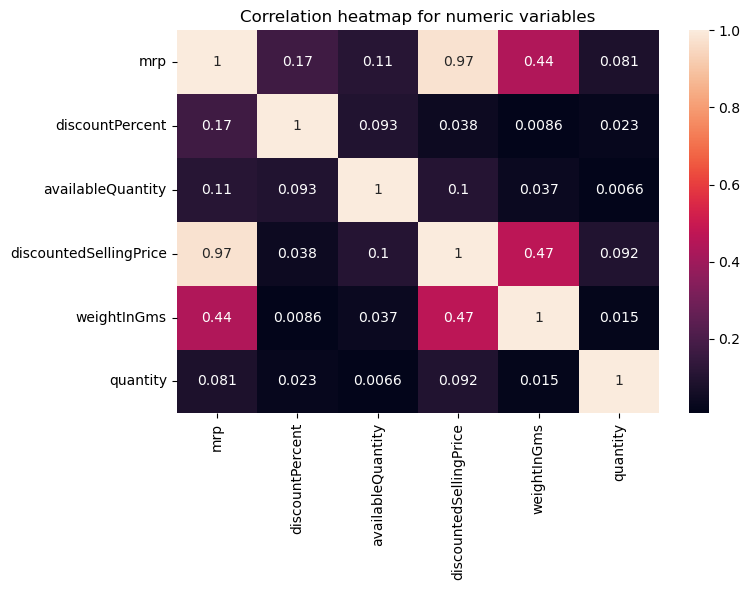

In [47]:
# Correlation heatmap for numeric variables
heatmap_var = df.select_dtypes(include = np.number).corr()
plt.figure(figsize =(8,6))
sns.heatmap(heatmap_var, annot = True)
plt.title('Correlation heatmap for numeric variables')
plt.tight_layout()
plt.show()

<!-- Business Requirements -->

<h3 style="text-align:center">Business Requirement and KPI Analytics</h3>

In [126]:
# Which categories have the highest discounts?
category_discounts = round(df.groupby('Category')['discountPercent'].mean().sort_values(ascending = False),2)
print(f'Highest Category Discount \n{category_discounts}')

Highest Category Discount 
Category
Fruits & Vegetables      15.46
Meats, Fish & Eggs       11.03
Chocolates & Candies      8.32
Ice Cream & Desserts      8.32
Packaged Food             8.32
Biscuits                  8.24
Health & Hygiene          8.05
Cooking Essentials        7.16
Munchies                  7.16
Beverages                 7.16
Dairy, Bread & Batter     7.16
Paan Corner               6.24
Personal Care             6.24
Home & Cleaning           5.70
Name: discountPercent, dtype: float64


Conclusion :: 
Fruits & Vegetables has the Highest Discount Rate.
Home & Cleaning items are with the lowest discount rate.

In [83]:
# Are there products with unusually high MRPs
df.query("mrp > 1000 or discountedSellingPrice > 1000")

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
114,Cooking Essentials,Fortune Soyabean Oil,1005.0,0,6,999.0,5000,False,5
118,Cooking Essentials,Dhara Health Refined Sun Flower Oil Jar,1200.0,18,6,984.0,5000,False,5
121,Cooking Essentials,Dhara Kachi Ghani Mustard Oil Jar,1250.0,8,6,1143.0,5000,False,5
144,Cooking Essentials,Saffola Gold (Jar),1240.0,0,6,1240.0,5000,False,5
146,Cooking Essentials,Fortune Rice Bran Health Oil (Jar),1050.0,1,6,1039.0,5000,False,5
224,Cooking Essentials,Dhara Filtered Groundnut Oil (Jar),1050.0,1,6,1035.0,5000,False,5
363,Cooking Essentials,Praakritik Natural Desi Gir Cow A2 Ghee,1450.0,10,6,1305.0,540,False,540
511,Cooking Essentials,Dhara Filtered Groundnut Oil (Jar),1050.0,0,2,1050.0,5000,False,5
517,Cooking Essentials,Borges Extra Light Olive Oil Bottle,2600.0,46,6,1399.0,2000,False,2
628,Munchies,Fortune Soyabean Oil,1005.0,0,6,999.0,5000,False,5


Conclusion :: 
Based on the weightInGms comparision, if we take a broader look, there's no unusual high-priced product.

In [82]:
# Average discount percent per category
round(df.groupby('Category')['discountPercent'].mean().sort_values(ascending = False),2)

Category
Fruits & Vegetables      15.46
Meats, Fish & Eggs       11.03
Chocolates & Candies      8.32
Ice Cream & Desserts      8.32
Packaged Food             8.32
Biscuits                  8.24
Health & Hygiene          8.05
Cooking Essentials        7.16
Munchies                  7.16
Beverages                 7.16
Dairy, Bread & Batter     7.16
Paan Corner               6.24
Personal Care             6.24
Home & Cleaning           5.70
Name: discountPercent, dtype: float64

Conclusion :: 
Fruits & Vegetables has the highest average discountPercent
Note :: Please Note that there are some data-quality issues in the dataset. (Please Refer the Data Quality Note: Cross-listed Products Section)

In [99]:
# Which products provide the best value (highest discount with lowest final price)?
best_deal = df.groupby('name')[['discountPercent','discountedSellingPrice']].max().sort_values(by = ['discountPercent','discountedSellingPrice'], ascending =[False, True])
best_deal.head(10)

,discountPercent,discountedSellingPrice
name,,
Dukes Waffy Chocolate Wafers,51,22.0
Dukes Waffy Orange Wafers,51,22.0
Dukes Waffy Strawberry Wafers,51,22.0
Epigamia Fruit Yogurt Alphonso Mango,50,20.0
Epigamia Fruit Yogurt Strawberry,50,20.0
Epigamia Fruit Yogurt Vanilla,50,20.0
Dukes Waffy Chocolate Wafer Rolls,50,75.0
Dukes Waffy Strawberry Roll,50,75.0
Chef's Basket Durum Wheat Elbow Pasta,50,80.0


Conclusion ::
'Dukes Waffy Chocolate Wafers', 'Dukes Waffy Orange Wafers' & 'Dukes Waffy Strawberry Wafers' are the products with highest discount with lowest final price.
Since Top 3 items are Wafers, seems like these are most add-ons (Products added by the Customers to get some more discounts).
Or, People are really Fan of Wafers.

In [111]:
# Categories where discounts don’t impact much.
df['diff_mrp & discountedSellingPrice'] = df['mrp'] - df['discountedSellingPrice']
round(df.groupby('Category')[['mrp','discountedSellingPrice','diff_mrp & discountedSellingPrice']].mean().sort_values(by = 'diff_mrp & discountedSellingPrice', ascending = True),2)

,mrp,discountedSellingPrice,diff_mrp & discountedSellingPrice
Category,,,
Biscuits,59.49,52.78,6.71
Fruits & Vegetables,47.01,39.84,7.17
Home & Cleaning,152.94,142.18,10.76
Health & Hygiene,159.18,145.86,13.32
Chocolates & Candies,155.73,141.08,14.65
Ice Cream & Desserts,155.73,141.08,14.65
Packaged Food,155.73,141.08,14.65
Beverages,118.71,103.73,14.98
"Dairy, Bread & Batter",118.71,103.73,14.98


'Biscuits' is the category where discounts don’t impact much.
**Note** :: There are some Data Quality issues. (Please Refer to the **Data Quality Note** appended in the last cell)

<h3 style="text-align:center">Data Quality Note: Cross-listed Products</h3>

During the analysis, I observed that certain products are associated with multiple categories. 

**For example:**
'Praakritik Natural Desi Gir Cow A2' Ghee appears in both 'Cooking Essentials' and 'Munchies'

**Flagging this issue ::**

Category-level insights (like average discount per category, sales by category) may be distorted due to double-counting.
Product-level analysis remains unaffected, since each product can still be treated as a unique entity.
For modeling or downstream reporting, inconsistent category labeling could reduce accuracy.


**Recommendation::**
This issue should be validated with the data engineering or category management team. 
A clear primary category mapping for each product would ensure more reliable reporting and analysis.